# Импорты

Загрузка файла

In [ ]:
#! pip install gdown==v4.6.3
! pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
! gdown --id 1m4CIIXFb9fFqgvYgtagZ7Jq_O1iisRWm
# https://drive.google.com/file/d/1m4CIIXFb9fFqgvYgtagZ7Jq_O1iisRWm/view?usp=sharing

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1m4CIIXFb9fFqgvYgtagZ7Jq_O1iisRWm
To: /content/playground-series-s4e3.zip
100% 1.83M/1.83M [00:00<00:00, 168MB/s]


In [ ]:
! unzip /content/playground-series-s4e3.zip -d /content/competition_format

Archive:  /content/playground-series-s4e3.zip
  inflating: /content/competition_format/sample_submission.csv  
  inflating: /content/competition_format/test.csv  
  inflating: /content/competition_format/train.csv  


Подгрузка библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(4,3)})

pd.set_option('display.max_columns', None)

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.metrics import f1_score, auc, roc_auc_score

from sklearn.model_selection import train_test_split

In [ ]:
! pip install catboost

import catboost
from catboost import CatBoostClassifier, FeaturesData, metrics,  Pool, cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.8 MB/s eta 0:00:00


In [ ]:
! pip install klib
import klib

## Загружаем данные

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')
train_og = train

In [ ]:
len(test)

12814

In [ ]:
len(train)

19219

In [ ]:
train.sample(2)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
16058,16058,810,824,812031,812044,69,11,17,6557,80,102,1360,1,0,300,0.7287,0.5385,0.5385,0.0043,0.6364,1.0000,1.0,1.8389,0.8451,1.1139,0.4615,-0.3077,0.1965,0,0,0,0,0,0,1
6720,6720,41,214,4440514,4440576,6176,310,159,689727,38,124,1356,0,1,40,0.0605,0.4577,0.3823,0.1254,0.5833,0.4545,0.0,3.7948,2.2304,1.8261,-0.6176,-0.1851,1.0000,0,0,1,0,0,0,0


In [ ]:
test.sample(2)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
170,19389,4,12,835980,835993,170,15,26,18996,81,126,1698,0,1,90,0.0047,0.3383,0.1842,0.0041,0.4667,1.0000,1.0,2.2304,0.8451,1.4150,0.8158,-0.1527,0.4399
1675,20894,964,979,28972,289995,308,29,34,30361,99,132,1387,0,1,40,0.7463,0.4398,0.2800,0.0124,0.4400,0.9714,1.0,2.4885,1.2305,1.5315,0.7200,-0.1253,0.8299


# Знакомство

In [ ]:
train.isna().mean()

id                       0.0
X_Minimum                0.0
X_Maximum                0.0
Y_Minimum                0.0
Y_Maximum                0.0
Pixels_Areas             0.0
X_Perimeter              0.0
Y_Perimeter              0.0
Sum_of_Luminosity        0.0
Minimum_of_Luminosity    0.0
Maximum_of_Luminosity    0.0
Length_of_Conveyer       0.0
TypeOfSteel_A300         0.0
TypeOfSteel_A400         0.0
Steel_Plate_Thickness    0.0
Edges_Index              0.0
Empty_Index              0.0
Square_Index             0.0
Outside_X_Index          0.0
Edges_X_Index            0.0
Edges_Y_Index            0.0
Outside_Global_Index     0.0
LogOfAreas               0.0
Log_X_Index              0.0
Log_Y_Index              0.0
Orientation_Index        0.0
Luminosity_Index         0.0
SigmoidOfAreas           0.0
Pastry                   0.0
Z_Scratch                0.0
K_Scatch                 0.0
Stains                   0.0
Dirtiness                0.0
Bumps                    0.0
Other_Faults  

In [ ]:
test.isna().mean()

id                       0.0
X_Minimum                0.0
X_Maximum                0.0
Y_Minimum                0.0
Y_Maximum                0.0
Pixels_Areas             0.0
X_Perimeter              0.0
Y_Perimeter              0.0
Sum_of_Luminosity        0.0
Minimum_of_Luminosity    0.0
Maximum_of_Luminosity    0.0
Length_of_Conveyer       0.0
TypeOfSteel_A300         0.0
TypeOfSteel_A400         0.0
Steel_Plate_Thickness    0.0
Edges_Index              0.0
Empty_Index              0.0
Square_Index             0.0
Outside_X_Index          0.0
Edges_X_Index            0.0
Edges_Y_Index            0.0
Outside_Global_Index     0.0
LogOfAreas               0.0
Log_X_Index              0.0
Log_Y_Index              0.0
Orientation_Index        0.0
Luminosity_Index         0.0
SigmoidOfAreas           0.0
dtype: float64

In [ ]:
train.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

### Набор параметров для оценки


Chat-GPT любезно объяснил дефекты

**Pastry** (Тесто) обычно относится к дефектам на поверхности стали, напоминающим внешний вид или текстуру теста, например, поверхностные неровности или участки с избыточным материалом. Эти дефекты могут возникать в результате неправильной обработки материала на начальных этапах производства.

**Z_Scratch** (Z-Царапина) указывает на специфические царапины, имеющие форму буквы "Z" на поверхности металла. Это может быть результатом механического воздействия оборудования или инструментов на сталь во время её обработки.

**K_Scatch** (K-Царапина) - дефекты, аналогичные Z_Scratch, но формирующиеся в виде буквы "K". Эти царапины часто являются следствием специфических условий обработки или случайного контакта с оборудованием.

**Stains (Пятна)** - это поверхностные изменения цвета или окраски стали, которые могут быть вызваны коррозией, окислением, контактом с веществами, вызывающими химические реакции, или оставшимися веществами от процессов обработки.

**Dirtiness** (Грязь) - относится к наличию загрязнений на стали, таких как масло, жир, пыль или другие частицы. Эти дефекты могут негативно сказываться на качестве покрытия или последующей обработке стали.

**Bumps**
Bumps (Выпуклости) - это возвышения или выпуклые дефекты на поверхности стали, которые могут возникнуть в результате неправильного охлаждения, деформации при транспортировке или из-за включений в материале.

<Axes: title={'center': 'Feature-correlation (pearson)'}>

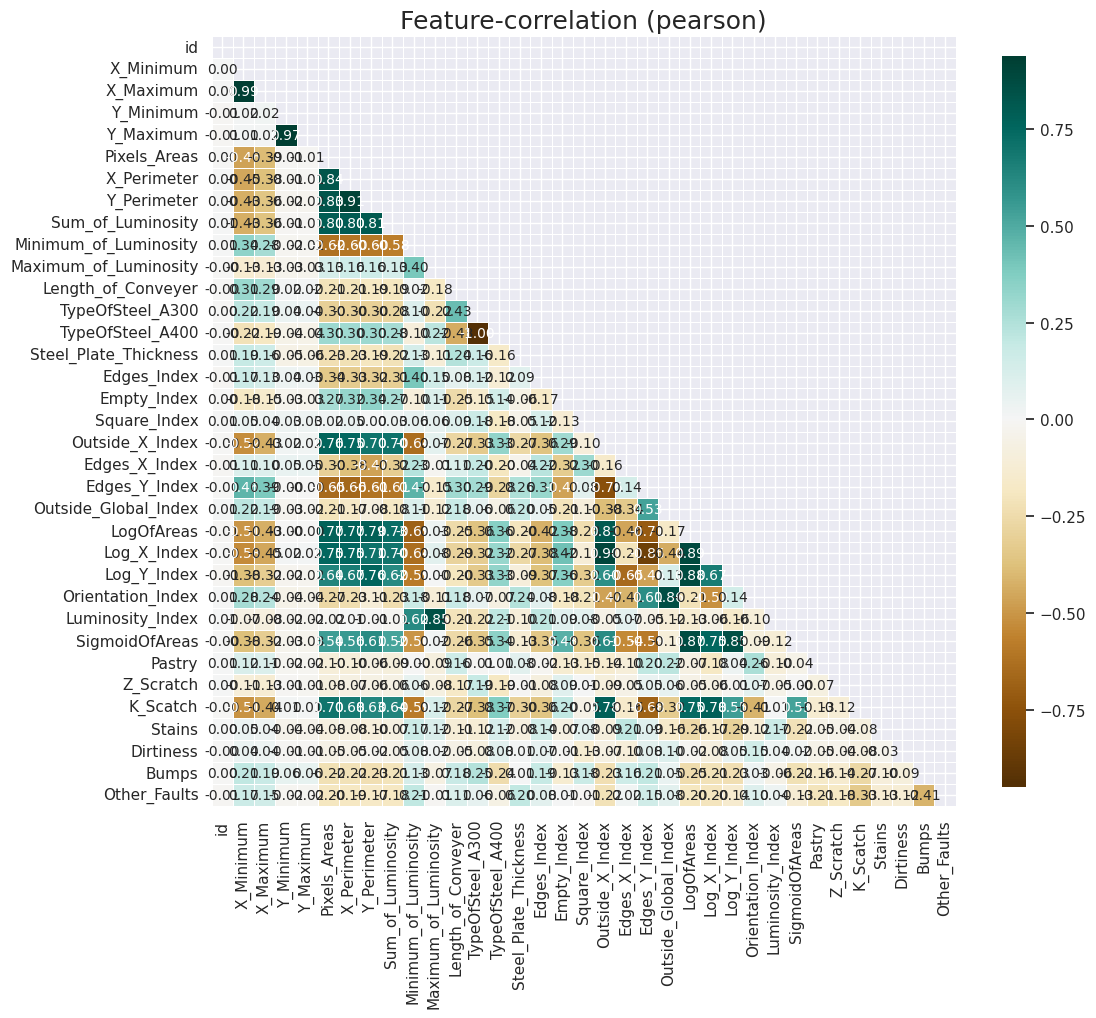

In [ ]:
# Visualize correlation heatmap
klib.corr_plot(train)

# Итерация 1. Catboost c валидационной выборкой

### 🔃 Точка рестарта 🔃

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')
train_og = train

In [ ]:
#делим на валидацию и трейн
# делаю валидационную выборку для оценки и проверки
val, train = train_test_split(train_og, train_size=0.10, random_state=7374)

In [ ]:
train.columns

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

params = {'verbose':100,
          'random_seed':7374,
          'eval_metric': 'AUC',
          #'task_type' : 'GPU'
          }

## Цикл обучения-предикта каждой из вероятностей

In [ ]:
importances = pd.DataFrame()

for feature in y:
  #делим на валидацию и трейн
  val, train = train_test_split(train_og, train_size=0.2, random_state=7374)
  #создаем пулы
  train_data = Pool(data=train[X], label=train[feature])
  valid_data = Pool(data=val[X], label=val[feature])
  #создание моделей
  model = CatBoostClassifier(**params)
  model.fit(train_data, eval_set=valid_data)
  #запись предиктов
  test[feature] = model.predict_proba(test[X])[:,1]
  #получаем feature_importnace, переименовываем столбы и добавляет в таблицу importnaces
  fi = model.get_feature_importance(prettified=True)
  fi.columns = [f'{col}_{feature}' for col in fi.columns ]
  importances = pd.concat([importances, fi], axis = 1 )

In [ ]:
test[['id']+y].sample(2)

In [ ]:
importances

# Делаем предикт

In [ ]:
test[['id']+y].to_csv('S4E3_it1_03.csv', index = False)

## Результат

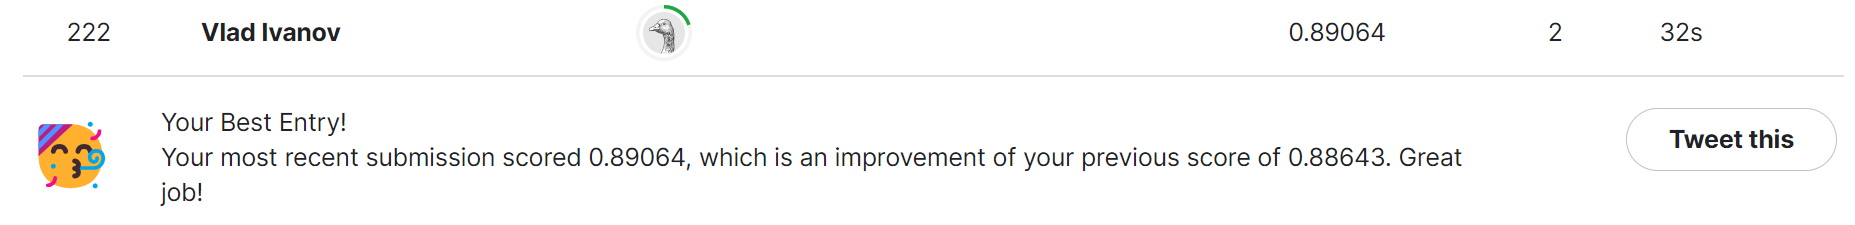

## Добавил рандомную Фичу для оценки feature_importance

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Random_F']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

params = {'verbose':100,
          'random_seed':7374,
          'eval_metric': 'AUC',
          'task_type' : 'GPU'}

## Цикл обучения-предикта каждой из вероятностей c рандомной фичей

In [ ]:
importances = pd.DataFrame()

for feature in y:
  #делим на валидацию и трейн
  val, train = train_test_split(train_og, train_size=0.10, random_state=7374)
  train['Random_F'] = np.random.randint(800, 1200, train.shape[0])
  test['Random_F'] = np.random.randint(800, 1200, test.shape[0])
  val['Random_F'] = np.random.randint(800, 1200, val.shape[0])
  #создаем пулы
  train_data = Pool(data=train[X], label=train[feature])
  valid_data = Pool(data=val[X], label=val[feature])
  #создание моделей
  model = CatBoostClassifier(**params)
  model.fit(train_data,eval_set=valid_data)
  #запись предиктов
  test[feature] = model.predict_proba(test[X])[:,1]
  #получаем feature_importnace, переименовываем столбы и добавляет в таблицу importnaces
  fi = model.get_feature_importance(prettified=True)
  fi.columns = [f'{col}_{feature}' for col in fi.columns ]
  importances = pd.concat([importances, fi], axis = 1 )

In [ ]:
importances

# Итерация 2. XGBoost c валидационной выборкой

In [ ]:
import xgboost
from xgboost import XGBClassifier

### 🔃 Точка рестарта 🔃

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')
train_og = train

In [ ]:
#делим на валидацию и трейн
# делаю валидационную выборку для оценки и проверки
#val, train = train_test_split(train_og, train_size=0.20, random_state=7374)

In [ ]:
train.columns

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## Цикл обучения-предикта каждой из вероятностей

In [ ]:
importances = pd.DataFrame()

for feature in tqdm(y):
  #делим на валидацию и трейн
  val, train = train_test_split(train_og, train_size=0.10, random_state=7374)

  #создание моделей
  model = xgboost.XGBClassifier(use_label_encoder=False,
                                eval_metric='auc',
                                max_depth = 3,
                                subsample = 0.8,
                                colsample_bytree = 0.6,
                                n_estimators = 300)

  model.fit(train[X],train[y])

  #запись предиктов
  test[feature] = model.predict_proba(test[X])[:,1]


In [ ]:
test

# Делаем предикт

In [ ]:
test[['id']+y].to_csv('S4E3_it2_xgboost_2.csv', index = False)

## Результаты

#Итерация 3. С **hyperopt**

In [ ]:
!pip install hyperopt
import hyperopt

In [ ]:
SEED = 7374

### 🔃 Точка рестарта 🔃

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')
train_og = train

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## Функция для hyperopt

In [ ]:
def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=140,
        eval_metric=metrics.Accuracy(),
        random_seed=42,
        verbose=False,
        loss_function=metrics.Logloss()
    )

    cv_data = cv(
        Pool(train[X], train[feature]),
        model.get_params(),
        logging_level='Silent',
    )
    best_accuracy = np.max(cv_data['test-Accuracy-mean'])

    return 1 - best_accuracy # as hyperopt minimises

In [ ]:
importances = pd.DataFrame()

for feature in tqdm(y):
  #делим на валидацию и трейн
  val, train = train_test_split(train_og, train_size=0.10, random_state=7374)
  #создаем пулы
  train_data = Pool(data=train[X], label=train[feature])
  valid_data = Pool(data=val[X], label=val[feature])
  #прописываем параметры
  params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 0.1),
  }

  trials = hyperopt.Trials()

  best = hyperopt.fmin(
      hyperopt_objective,
      space=params_space,
      algo=hyperopt.tpe.suggest,
      max_evals=10,
      trials=trials,
      rstate=np.random.default_rng(SEED)
  )


  #создание моделей
  model = CatBoostClassifier(
    l2_leaf_reg=int(best['l2_leaf_reg']),
    learning_rate=best['learning_rate'],
    iterations=140,
    eval_metric='AUC',
    random_seed=SEED,
    verbose=False,
    loss_function=metrics.Logloss(),
    )

  model.fit(train[X], train[feature])

  #запись предиктов
  test[feature] = model.predict_proba(test[X])[:,1]

  #получаем feature_importnace, переименовываем столбы и добавляет в таблицу importnaces
  fi = model.get_feature_importance(prettified=True)
  fi.columns = [ f'{col}_{feature}' for col in fi.columns ]
  importances = pd.concat([importances, fi], axis = 1 )

Поменять метрику eval_metrics

In [ ]:
test

# Делаем предикт

In [ ]:
test[['id']+y].to_csv('S4E3_it3_02.csv', index = False)

## Результаты

# Итерация 4. Предобработка фич

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

### 🔃 Точка рестарта 🔃

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')
train_og = train

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## Предобработка

In [ ]:
len(train[train[y].sum(axis=1) > 1])

В датасете присутствуют результаты в которых есть сразу несколько дефектов. Убираем такие строки, так как это может повлиять на точность модели.

In [ ]:
train = train[train[y].sum(axis=1) <= 1]

Для большей части записей в таблице указан класс стали А300 или А400. Уберем так же строки где сталь другого класса.

In [ ]:
(train['TypeOfSteel_A300'] + train['TypeOfSteel_A400']).mean()

In [ ]:
train = train[(train['TypeOfSteel_A300'] + train['TypeOfSteel_A400']) != 0]

## Уменьшение кол-во фичей, за счет взаимосвязанных

In [ ]:
#строим корреляционную матрицу
corr_matrix = train[X].corr('spearman')
dissimilarity = 1 - abs(corr_matrix.values)
#строим матрицу связей
linkage_matrix = hierarchy.linkage(squareform(dissimilarity), method='complete')
linkage_matrix

Функция, **create_clusters**, предназначена для создания кластеров на основе иерархической кластеризации, используя два основных входных аргумента: матрицу связей (`l_matrix`) и матрицу характеристик (`c_matrix`). В дополнение, функция принимает пороговое значение (`th`), которое по умолчанию установлено в 0.15, для определения расстояния, при котором кластеры должны быть образованы.

Вот более подробное объяснение функции:

Параметры функции:

`l_matrix` (np.ndarray): Матрица связей, представляющая иерархическое древовидное представление элементов, которые должны быть кластеризованы.

`c_matrix` (pd.DataFrame): DataFrame, содержащий характеристики (или признаки) каждого элемента. Столбцы этого DataFrame соответствуют различным характеристикам.

`th` (float, необязательный): Пороговое значение расстояния для формирования кластеров. По умолчанию установлено в 0.15.

Первоисточник: https://www.kaggle.com/code/noepinefrin/0-89534-clustered-feature-lgbm-xgb-cat/notebook

In [ ]:
def create_clusters(l_matrix: np.ndarray, c_matrix: pd.DataFrame, th: float = 0.15) -> dict:
    cluster_labels = hierarchy.fcluster(l_matrix, th, criterion='distance')
    n_clusters = len(set(cluster_labels))

    print(f'Number of clusters: {n_clusters}')

    cluster_features = {}

    for label in range(1, n_clusters + 1):

        leaves_in_cluster = cluster_labels == label
        cluster_features[label] = c_matrix.columns[leaves_in_cluster].to_list()

    return cluster_features

In [ ]:
clusters = create_clusters(linkage_matrix, corr_matrix, 0.01)
clusters

При выставлении порога на 0.01 - получаем 25 кластеров из 27 первоначальных фич. Подтверждается ранее выдвинутой предположение, о возможности убрать один из классов `['TypeOfSteel_A300', 'TypeOfSteel_A400']` как взаимосвязанные. Так же найдена взаимосвязь между `['Pixels_Areas', 'LogOfAreas']`


Попробуем увеличить порог, для уменьшения количества кластеров (фич для финального предсказания)

In [ ]:
clusters = create_clusters(linkage_matrix, corr_matrix, 0.15)
clusters

Оставляем фичи согласно получившейся кластеризации:

In [ ]:
#filtered_features
filtered_X = [column[0] for column in clusters.values()]
filtered_X

С валидационной выборкой 10%

In [ ]:
importances = pd.DataFrame()

for feature in tqdm(y):
  #делим на валидацию и трейн
  val, train = train_test_split(train_og, train_size=0.1, random_state=7374)
  #создаем пулы
  train_data = Pool(data=train[filtered_X], label=train[feature])
  valid_data = Pool(data=val[filtered_X], label=val[feature])
  #создание моделей
  model = CatBoostClassifier(**params)
  model.fit(train_data, eval_set=valid_data)

  # Получение лучших параметров модели
  best_params = model.get_params()
  print("Лучшие параметры:", best_params)

  #запись предиктов
  test[feature] = model.predict_proba(test[filtered_X])[:,1]


  #получаем feature_importnace, переименовываем столбы и добавляет в таблицу importnaces
  fi = model.get_feature_importance(prettified=True)
  fi.columns = [f'{col}_{feature}' for col in fi.columns ]
  importances = pd.concat([importances, fi], axis = 1 )

In [ ]:
importances

Результат с валидационной выборкой 0.1

**Score: 0.89035**

Без валидационной выборки, обучение на всех данных показал результат хуже.

Score: 0.88464

Результат с валидационной выборкой 0.2

Score: 0.88935


# Итерация 4.1. Предобработка фич + построение отдельной модели для каждой таргет-фичи. Подбор параметров при помощи сетки

### 🔃 Точка рестарта 🔃

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')
train_og = train

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## Предобработка

In [ ]:
train = train[train[y].sum(axis=1) <= 1]
train = train[(train['TypeOfSteel_A300'] + train['TypeOfSteel_A400']) != 0]
#строим корреляционную матрицу
corr_matrix = train[X].corr('spearman')
dissimilarity = 1 - abs(corr_matrix.values)
#строим матрицу связей
linkage_matrix = hierarchy.linkage(squareform(dissimilarity), method='complete')
linkage_matrix

In [ ]:
def create_clusters(l_matrix: np.ndarray, c_matrix: pd.DataFrame, th: float = 0.15) -> dict:
    cluster_labels = hierarchy.fcluster(l_matrix, th, criterion='distance')
    n_clusters = len(set(cluster_labels))

    print(f'Number of clusters: {n_clusters}')

    cluster_features = {}

    for label in range(1, n_clusters + 1):

        leaves_in_cluster = cluster_labels == label
        cluster_features[label] = c_matrix.columns[leaves_in_cluster].to_list()

    return cluster_features


clusters = create_clusters(linkage_matrix, corr_matrix, 0.15)
clusters

#filtered_features Оставляем фичи согласно получившейся кластеризации:
filtered_X = [column[0] for column in clusters.values()]
filtered_X

## Подбор параметров по сетке для каждой из фич

In [ ]:
params = {'verbose':200,
          'random_seed':7374,
          'eval_metric': 'AUC',
          #'task_type' : 'GPU',
          'early_stopping_rounds': 250,
          }

## Цикл обучения-предикта каждой из вероятностей

In [ ]:
#начальная сетка
# grid = {'learning_rate': [0.01, 0.05, 0.1],
#         'depth': [5, 6, 10],
#         'min_data_in_leaf' : [3, 10, 12]}

### [Pastry]  

In [ ]:
feature = 'Pastry'

In [ ]:
grid = {'learning_rate': [0.02],
        'depth': [6],
        'min_data_in_leaf' : [3]}

In [ ]:
train_data = Pool(data=train[filtered_X], label=train[feature])
#создается модель
model = CatBoostClassifier(**params)
#результаты
result = model.grid_search(grid, train_data, verbose=False)

In [ ]:
#Лучшие найденные параметры
result['params']

Фиксируем лучшие параметры. Делаем предсказание таргета для теста

In [ ]:
test[feature] = model.predict_proba(test[filtered_X])[:,1]
test.sample(1)

### [Z_Scratch]  

In [ ]:
feature = 'Z_Scratch'

In [ ]:
grid = {'learning_rate': [0.1],
        'depth': [10],
        'min_data_in_leaf' : [3]}

In [ ]:
train_data = Pool(data=train[filtered_X], label=train[feature])
#создается модель
model = CatBoostClassifier(**params)
#результаты
result = model.grid_search(grid, train_data, verbose=False)

In [ ]:
#Лучшие найденные параметры
result['params']

In [ ]:
test[feature] = model.predict_proba(test[filtered_X])[:,1]
test.sample(1)

### [K_Scatch]  

In [ ]:
feature = 'K_Scatch'

In [ ]:
grid = {'learning_rate': [0.2],
        'depth': [5],
        'min_data_in_leaf' : [3]}

In [ ]:
train_data = Pool(data=train[filtered_X], label=train[feature])
#создается модель
model = CatBoostClassifier(**params)
#результаты
result = model.grid_search(grid, train_data, verbose=False)

In [ ]:
#Лучшие найденные параметры
result['params']

In [ ]:
test[feature] = model.predict_proba(test[filtered_X])[:,1]
test.sample(1)

### [Stains]  

In [ ]:
feature = 'Stains'

In [ ]:
grid = {'learning_rate': [0.015],
        'depth': [5],
        'min_data_in_leaf' : [3]}

In [ ]:
train_data = Pool(data=train[filtered_X], label=train[feature])
#создается модель
model = CatBoostClassifier(**params)
#результаты
result = model.grid_search(grid, train_data, verbose=False)

In [ ]:
#Лучшие найденные параметры
result['params']

In [ ]:
test[feature] = model.predict_proba(test[filtered_X])[:,1]
test.sample(1)

### [Dirtiness]  

In [ ]:
feature = 'Dirtiness'

In [ ]:
grid = {'learning_rate': [0.1995],
        'depth': [5],
        'min_data_in_leaf' : [3]}

In [ ]:
train_data = Pool(data=train[filtered_X], label=train[feature])
#создается модель
model = CatBoostClassifier(**params)
#результаты
result = model.grid_search(grid, train_data, verbose=False)

In [ ]:
#Лучшие найденные параметры
result['params']

In [ ]:
test[feature] = model.predict_proba(test[filtered_X])[:,1]
test.sample(1)

### [Bumps]  

In [ ]:
feature = 'Bumps'

In [ ]:
grid = {'learning_rate': [0.01],
        'depth': [6],
        'min_data_in_leaf' : [3]}

In [ ]:
train_data = Pool(data=train[filtered_X], label=train[feature])
#создается модель
model = CatBoostClassifier(**params)
#результаты
result = model.grid_search(grid, train_data, verbose=False)

In [ ]:
#Лучшие найденные параметры
result['params']

In [ ]:
test[feature] = model.predict_proba(test[filtered_X])[:,1]
test.sample(1)

### [Other_Faults]  

In [ ]:
feature = 'Other_Faults'

In [ ]:
grid = {'learning_rate': [0.1],
        'depth': [6],
        'min_data_in_leaf' : [3]}

In [ ]:
train_data = Pool(data=train[filtered_X], label=train[feature])
#создается модель
model = CatBoostClassifier(**params)
#результаты
result = model.grid_search(grid, train_data, verbose=False)

In [ ]:
#Лучшие найденные параметры
result['params']

In [ ]:
test[feature] = model.predict_proba(test[filtered_X])[:,1]
test.sample(1)

# Делаем предикт

In [ ]:
test[['id']+y].to_csv('S4E3_it4_manual_grid.csv', index = False)

## Результаты

Результат предикта с ручной оптимизацией параметров по сетке:  
Score: **0.87818**


# Итерация 5. Предобработка фич + Optuna с Catboost

In [ ]:
! pip install optuna

In [ ]:
import optuna

### 🔃 Точка рестарта 🔃

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## Предобработка

In [ ]:
train = train[train[y].sum(axis=1) <= 1]
train = train[(train['TypeOfSteel_A300'] + train['TypeOfSteel_A400']) != 0]
# #строим корреляционную матрицу
# corr_matrix = train[X].corr('spearman')
# dissimilarity = 1 - abs(corr_matrix.values)
# #строим матрицу связей
# linkage_matrix = hierarchy.linkage(squareform(dissimilarity), method='complete')
# #linkage_matrix


# def create_clusters(l_matrix: np.ndarray, c_matrix: pd.DataFrame, th: float = 0.15) -> dict:
#     cluster_labels = hierarchy.fcluster(l_matrix, th, criterion='distance')
#     n_clusters = len(set(cluster_labels))

#     print(f'Number of clusters: {n_clusters}')

#     cluster_features = {}

#     for label in range(1, n_clusters + 1):

#         leaves_in_cluster = cluster_labels == label
#         cluster_features[label] = c_matrix.columns[leaves_in_cluster].to_list()

#     return cluster_features


# clusters = create_clusters(linkage_matrix, corr_matrix, 0.15)
# clusters

# #filtered_features Оставляем фичи согласно получившейся кластеризации:
# filtered_X = [column[0] for column in clusters.values()]
# filtered_X

In [ ]:
train_og = train

# Делаем предикт

## Настройка Optuna (перенесено внутрь цикла)

## Цикл оптимизации параметров, обучения-предикта каждой из вероятностей

In [ ]:
importances = pd.DataFrame()

for feature in tqdm(y):
  print("Feature: ", feature)
  #делим на валидацию и трейн
  val, train = train_test_split(train_og, train_size=0.15, random_state=74, stratify = train_og[feature])

  #objective function, which Optuna aims to optimize
  def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 2, 10, step = 1),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = catboost.CatBoostClassifier(**params, silent=True)
    model.fit(train[X], train[feature])
    predictions = model.predict(val[X])
    ll = Logloss(val[feature], predictions)
    return ll

  study = optuna.create_study(direction='minimize')
  study.optimize(objective, n_trials=30)

  best_trial = study.best_trial

  train_data = Pool(data=train_og[X], label=train_og[feature])

  model = catboost.CatBoostClassifier(**best_trial.params, silent=True)
  model.fit(train_data)

  #запись предиктов
  test[feature] = model.predict_proba(test[X])[:,1]

  #получаем feature_importnace, переименовываем столбы и добавляет в таблицу importnaces
  importances = importances.append(study.best_params, ignore_index=True)

In [ ]:
importances

# Делаем предикт

In [ ]:
test[['id']+y].to_csv('S4E3_it5_30_trials_015.csv', index = False)

## Результаты

Результат предикта

для n-trials = **2**: **0.88785**

для n-trials = **10** (t = 25 min): **0.88992**

для n-trials = **10** (t = 18 min, с предобработкой): **0.88941**

для n-trials = **10** (t = 18 min, с предобработкой и на уменьшенной до 10% валидационной выборки): **0.88506**

для n-trials = **10** (t = 25 min, без фильтрации фич, на 15% валидационной выборки): **0.88934**

для n-trials = **30** (t = 45 min, без фильтрации фич, на 15% валидационной выборки): **0.88538**


# Итерация 6. Предобработка фич + Optuna с XGBoost

### 🔃 Точка рестарта 🔃

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## Предобработка

In [ ]:
train = train[train[y].sum(axis=1) <= 1]
train = train[(train['TypeOfSteel_A300'] + train['TypeOfSteel_A400']) != 0]

In [ ]:
train_og = train

# Делаем предикт

## Настройка Optuna (внутри цикла)

In [ ]:
importances = pd.DataFrame()

for feature in tqdm(y):
  print("Feature: ", feature)
  #делим на валидацию и трейн
  val, train = train_test_split(train_og, train_size=0.15, random_state=74, stratify = train_og[feature])

  #objective function, which Optuna aims to optimize
  def objective(trial):
    params = {
        #"iterations": 1000,
        "eta": trial.suggest_float("eta", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 10, step = 1),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = xgboost.XGBClassifier(**params)
    model.fit(train[X], train[feature])
    predictions = model.predict(val[X])

    auc = roc_auc_score(val[feature], predictions)
    return auc

  study = optuna.create_study(direction='maximize')
  study.optimize(objective, n_trials=25)

  best_trial = study.best_trial

  train_data = Pool(data=train_og[X], label=train_og[feature])

  model = xgboost.XGBClassifier(**best_trial.params)
  model.fit(train_og[X], train_og[feature])

  #запись предиктов
  test[feature] = model.predict_proba(test[X])[:,1]

  #получаем feature_importnace, переименовываем столбы и добавляет в таблицу importnaces
  importances = importances.append(study.best_params, ignore_index=True)

In [ ]:
test.sample(5)

# Делаем предикт

In [ ]:
test[['id']+y].to_csv('S4E3_it6_trails25.csv', index = False)

# Итерация 7. Optuna с ансамблем (XGBoost + Catboost)

In [ ]:
! pip install optuna

import optuna

In [ ]:
import xgboost
from xgboost import XGBClassifier

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

### 🔃 Точка рестарта 🔃

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## Предобработка

In [ ]:
train = train[train[y].sum(axis=1) <= 1]
train = train[(train['TypeOfSteel_A300'] + train['TypeOfSteel_A400']) != 0]
#строим корреляционную матрицу
corr_matrix = train[X].corr('spearman')
dissimilarity = 1 - abs(corr_matrix.values)
#строим матрицу связей


linkage_matrix = hierarchy.linkage(squareform(dissimilarity), method='complete')
#linkage_matrix


def create_clusters(l_matrix: np.ndarray, c_matrix: pd.DataFrame, th: float = 0.15) -> dict:
    cluster_labels = hierarchy.fcluster(l_matrix, th, criterion='distance')
    n_clusters = len(set(cluster_labels))

    print(f'Number of clusters: {n_clusters}')

    cluster_features = {}

    for label in range(1, n_clusters + 1):

        leaves_in_cluster = cluster_labels == label
        cluster_features[label] = c_matrix.columns[leaves_in_cluster].to_list()

    return cluster_features


clusters = create_clusters(linkage_matrix, corr_matrix, 0.15)
clusters

#filtered_features Оставляем фичи согласно получившейся кластеризации:
filtered_X = [column[0] for column in clusters.values()]
filtered_X

In [ ]:
train_og = train
X = filtered_X

## Цикл оптимизации параметров, обучения-предикта каждой из вероятностей

In [ ]:
N_trials = 5

In [ ]:
importances = pd.DataFrame()

results = []

for feature in tqdm(y):
  print("Feature: ", feature)
  #делим на валидацию и трейн
  val, train = train_test_split(train_og, train_size=0.25, random_state=74, stratify = train_og[feature])

  '''
  CATBOOST
  '''
  #objective function, which Optuna aims to optimize
  def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 2, 10, step = 1),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    Cat_model = catboost.CatBoostClassifier(**params, silent=True)
    Cat_model.fit(train[X], train[feature])
    predictions = Cat_model.predict(val[X])
    auc = roc_auc_score(val[feature], predictions)
    return auc

  study = optuna.create_study(direction='maximize')
  study.optimize(objective, n_trials=N_trials)

  Cat_best_trial = study.best_trial

  train_data = Pool(data=train_og[X], label=train_og[feature])

  Cat_model = catboost.CatBoostClassifier(**Cat_best_trial.params, silent=True)
  Cat_model.fit(train_data)

  print('Лучшие параметры Cat_model:  ', study.best_params, N_trials)
  '''
  XGBOOST
  '''
  #objective function, which Optuna aims to optimize
  def objective(trial):
    params = {
        #"iterations": 1000,
        "eta": trial.suggest_float("eta", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 10, step = 1),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    XGB_model = xgboost.XGBClassifier(**params)
    XGB_model.fit(train[X], train[feature])
    predictions = XGB_model.predict(val[X])

    auc = roc_auc_score(val[feature], predictions)
    return auc

  study = optuna.create_study(direction='maximize')
  study.optimize(objective, n_trials=N_trials)

  XGB_best_trial = study.best_trial

  train_data = Pool(data=train_og[X], label=train_og[feature])

  XGB_model = xgboost.XGBClassifier(**XGB_best_trial.params)
  XGB_model.fit(train_og[X], train_og[feature])

  print('Лучшие параметры XGB_model:  ', study.best_params, N_trials)

  '''
  VotingClassifier
  '''
  ensemble_model = VotingClassifier(
    estimators=[('cat', Cat_model), ('xgb', XGB_model)],
    voting='soft'
  )

  params_grid = {

      'weights': [(1, 1),
       (2, 1), (1, 2),(1,4), (4,1),
      (1,7), (7,1), (1,10), (10,1),
      (1,20), (20,1),]
      #
          # #'lr__C' : [0.5,1,1.5],
          # #'lr__class_weight': [None,'balanced'],
          # #'nb__alpha' : [0.1,1,2],
          # 'sgd__penalty' : ['l2', 'l1'],
          # 'sgd__alpha': [0.0001,0.001,0.01]
                  }

  grid = GridSearchCV(estimator=ensemble_model,
                      param_grid=params_grid,
                      cv=3, scoring='roc_auc',
                      n_jobs=-1)

  grid.fit(train_og[X], train_og[feature])

  #print(grid)

  print('Лучшие параметры grid -- ', grid.best_params_)

  #запись предиктов
  test[feature] = grid.predict_proba(test[X])[:,1]

  #получаем feature_importnace, переименовываем столбы и добавляет в таблицу importnaces


  importances = importances.append(results, ignore_index=True)

In [ ]:
ensemble_model

# Делаем предикт

In [ ]:
test[['id']+y].to_csv('S4E3_it7_trails5_allweights2.csv', index = False)

## Результаты

для n-trials = **5**:
Новый лучший результат скора: **0.89154**

для n-trials = **5** c фильтрацией коррелирующих фич: 0.88873

для n-trials = **30**:  **0.88815**

для n-trials = **5** c подборов весов по сетке: **0.88966**


для n-trials = **5** c подборов весов по сетке: **0.8899** (cv = 3)

для n-trials = **5** c подборов весов по сетке: **0.88955** (cv = 3)
(аналогия прошлой попытки но с фильтрацией кол-ва фич по матрице корреляций)



# Итерация 8. Optuna с ансамблем (XGBoost + Catboost) + FeatureEng

In [ ]:
! pip install optuna

import optuna
import xgboost
from xgboost import XGBClassifier
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

### 🔃 Точка рестарта 🔃

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## Предобработка

In [ ]:
def preprocess_data(data):

  epsilon = 1e-6
  # A small constant to avoid division by zero or taking the logarithm of zero


  data = data[(data['TypeOfSteel_A300'] + data['TypeOfSteel_A400']) != 0]

  data['Color_Range'] = data['Maximum_of_Luminosity'] - data['Minimum_of_Luminosity']
  data['Normalized_Luminosity_Index'] = data['Luminosity_Index'] / data['Pixels_Areas']


#Вычисляет отношение площади дефекта стали к его периметру по осям X и Y,
#что дает представление о компактности дефектов в каждом измерении'''

  data['Area_Perimeter_Ratio_X'] = data['Pixels_Areas'] / data['X_Perimeter']
  data['Area_Perimeter_Ratio_Y'] = data['Pixels_Areas'] / data['Y_Perimeter']

  data['Aspect_Ratio'] = (data['X_Maximum'] - data['X_Minimum']) / (abs(data['Y_Maximum'] - data['Y_Minimum']) + 1)

  data['Edge_to_Area_Ratio'] = data['Edges_Index'] / data['Pixels_Areas']

  # Symmetry Index Feature
  # Location Features
  data['X_Distance'] = data['X_Maximum'] - data['X_Minimum']
  data['Y_Distance'] = data['Y_Maximum'] - data['Y_Minimum']

  data['Symmetry_Index'] = np.abs(data['X_Distance'] - data['Y_Distance']) / (data['X_Distance'] + data['Y_Distance'] + epsilon)

  # Density Feature
  data['Density'] = data['Pixels_Areas'] / (data['X_Perimeter'] + data['Y_Perimeter'])

In [ ]:
preprocess_data(train)
train = train[train[y].sum(axis=1) <= 1]

In [ ]:
preprocess_data(test)

Смотрим как изменились кластеры с добавлением новых фич

In [ ]:
#строим корреляционную матрицу
corr_matrix = train[X].corr('spearman')
dissimilarity = 1 - abs(corr_matrix.values)
#строим матрицу связей


linkage_matrix = hierarchy.linkage(squareform(dissimilarity), method='complete')
#linkage_matrix


def create_clusters(l_matrix: np.ndarray, c_matrix: pd.DataFrame, th: float = 0.2) -> dict:
    cluster_labels = hierarchy.fcluster(l_matrix, th, criterion='distance')
    n_clusters = len(set(cluster_labels))

    print(f'Number of clusters: {n_clusters}')

    cluster_features = {}

    for label in range(1, n_clusters + 1):

        leaves_in_cluster = cluster_labels == label
        cluster_features[label] = c_matrix.columns[leaves_in_cluster].to_list()

    return cluster_features


clusters = create_clusters(linkage_matrix, corr_matrix, 0.15)
clusters

In [ ]:
train_og = train
#X = filtered_X

## Цикл оптимизации параметров, обучения-предикта каждой из вероятностей

In [ ]:
N_trials = 5

In [ ]:
importances = pd.DataFrame()

results = []


for feature in tqdm(y):
  print("Feature: ", feature)
  #делим на валидацию и трейн
  val, train = train_test_split(train_og, train_size=0.25, random_state=74, stratify = train_og[feature])

  '''
  CATBOOST
  '''
  #objective function, which Optuna aims to optimize
  def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 2, 10, step = 1),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    Cat_model = catboost.CatBoostClassifier(**params, silent=True)
    Cat_model.fit(train[X], train[feature])
    predictions = Cat_model.predict(val[X])
    auc = roc_auc_score(val[feature], predictions)
    return auc

  study = optuna.create_study(direction='maximize')
  study.optimize(objective, n_trials=N_trials)

  Cat_best_trial = study.best_trial

  train_data = Pool(data=train_og[X], label=train_og[feature])

  Cat_model = catboost.CatBoostClassifier(**Cat_best_trial.params, silent=True)
  Cat_model.fit(train_data)

  print('Лучшие параметры Cat_model:  ', study.best_params, N_trials)
  '''
  XGBOOST
  '''
  #objective function, which Optuna aims to optimize
  def objective(trial):
    params = {
        #"iterations": 1000,
        "eta": trial.suggest_float("eta", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 10, step = 1),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    XGB_model = xgboost.XGBClassifier(**params)
    XGB_model.fit(train[X], train[feature])
    predictions = XGB_model.predict(val[X])

    auc = roc_auc_score(val[feature], predictions)
    return auc

  study = optuna.create_study(direction='maximize')
  study.optimize(objective, n_trials=N_trials)

  XGB_best_trial = study.best_trial

  train_data = Pool(data=train_og[X], label=train_og[feature])

  XGB_model = xgboost.XGBClassifier(**XGB_best_trial.params)
  XGB_model.fit(train_og[X], train_og[feature])

  print('Лучшие параметры XGB_model:  ', study.best_params, N_trials)

  '''
  VotingClassifier
  '''
  ensemble_model = VotingClassifier(
    estimators=[('cat', Cat_model), ('xgb', XGB_model)],
    voting='soft'
  )

  params_grid = {

      'weights': [(1, 1),
       (2, 1), (1, 2),(1,4), (4,1),
      (1,7), (7,1), (1,10), (10,1),
      (1,20), (20,1),]
      #
          # #'lr__C' : [0.5,1,1.5],
          # #'lr__class_weight': [None,'balanced'],
          # #'nb__alpha' : [0.1,1,2],
          # 'sgd__penalty' : ['l2', 'l1'],
          # 'sgd__alpha': [0.0001,0.001,0.01]
                  }

  grid = GridSearchCV(estimator=ensemble_model,
                      param_grid=params_grid,
                      cv=3, scoring='roc_auc',
                      n_jobs=-1)

  grid.fit(train_og[X], train_og[feature])

  #print(grid)

  print('Лучшие параметры grid -- ', grid.best_params_)

  #запись предиктов
  test[feature] = grid.predict_proba(test[X])[:,1]

  #получаем feature_importnace, переименовываем столбы и добавляет в таблицу importnaces


  importances = importances.append(results, ignore_index=True)

In [ ]:
ensemble_model

# Делаем предикт

In [ ]:
test[['id']+y].to_csv('S4E3_it8_trails5.csv', index = False)

# Результаты

Лучший результат позволил набрать **0.88504** Public Score.

Занял 615 место из 2201 учасника.  Учитывая высокую конкуренцию в соревнованиях Playground, и что многие вещи которые пробовал в данном соревновании были для меня новыми, попадание в тир 30% считаю мини-успехом)